# FALL IE 423 - PROJECT PART 1 CODE & REPORT
### EYLÜL RANA SARAÇ
### MERVE NUR HÜNDÜR
### HATİCE EDA YILMAZ

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

After importing the necessary libraries, we read the wide format of the csv file into a Pandas DataFrame we created called "df_w". Then, we converted "timestamp" column, which is an object column to datetime format by using pd.to_datetime() function. Lastly, we sorted the rows of df_w according the "timestamp" column in ascending order. 

In [2]:
df_w = pd.read_csv("all_ticks_wide.csv")
df_w["timestamp"] = pd.to_datetime(df_w["timestamp"])
df_w = df_w.sort_values(by="timestamp")

Then, we created a function called Find_Outliers() which returns the outliers of a given dataframe. The function takes a dataframe of two columns as input, one being the "timestamp" and other being the column we want to find outliers of, finds the outliers for the second column by first calculating the mean and standart deviation, then creating the lower and upper 3-sigma limits by a simple formula, then iterating through the second column of the dataframe to find values that are higher than the upper limit or lower than the lower limit, lastly, it returns a dictionary called "outliers" which includes both lower and higher outliers. 

In [3]:
def Find_Outliers(df):
        mean = df.iloc[:,1].mean()
        std = df.iloc[:,1].std()
        upper_limit = mean + 3*std
        lower_limit = mean - 3*std
        lower_outliers = df[df.iloc[:,1] < lower_limit]
        higher_outliers = df[df.iloc[:,1] > upper_limit]
        outliers = {"lower_outliers" : lower_outliers, "higher_outliers" : higher_outliers }
        
        return outliers

Since we need to calculate the monthly outliers, we had to divide df_w into monthly dataframes. So, we created a new function called "Monthly_Data" which takes a dataframe, and a tuple key that indicates the exact year and month of that dataframe is needed as input, and returns the new dataframe. For instance, when the function is called as Monthly_Data(df = df_w, key = (2017,3)), it will return a new dataframe consisting of all the columns in df_w in 3rd month of 2017.

In [4]:
def Monthly_Data(df, key):
    df_Monthly_dictionary = {}
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df_yearly = df["timestamp"].dt.year
    for i in range(2012,2020):
        df_current_year = df.loc[df_yearly == i]
        df_current_year_monthly = df_current_year["timestamp"].dt.month
        for k in range(1,13):
             df_Monthly_dictionary[i,k] = df_current_year.loc[df_current_year_monthly == k]
    
    return df_Monthly_dictionary.get(key)

Next, we created the function Find_Outliers_Column_Month() which combines the functions Find_Outliers() and Monthly_Data(). Given the inputs that are a dataframe, column_name, and a key, Find_Outliers_Column_Month() returns a dictionary consisting of all the outliers of the given stock in that certain year and month. For example, when the function is called as Find_Outliers_Column_Month(df = df_w, column_name = "CEMAS", key = (2016, 5)), it returns the outliers of the stock data of CEMAS in the 5th month of 2016.

As our given data had several null values, we interpolated them by the Pandas DataFrame.interpolate() function. This function fills the null values by taking the average of values before and after the null value.

In [8]:
def Find_Outliers_Column_Month(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = Monthly_Data(df_column_without_null, key)
    return Find_Outliers(df_column_monthly)

# Find_Outliers_Column_Month(df_w,column_name = "CEMAS", key = (2017,2))

{'lower_outliers': Empty DataFrame
 Columns: [timestamp, CEMAS]
 Index: [],
 'higher_outliers':                       timestamp  CEMAS
 30467 2017-02-02 06:45:00+00:00   1.73}

Lastly, we created the function Create_Graph that takes a dataframe, column_name, and a key as input, and creates a line graph of the given stock at the given year and month. For instance, if the function is called as Create_Graph(df_w,column_name = "YATAS", key = (2017,9)), it draws a line graph in which has the values of CEMAS in 9th month of 2017 on y-axis, and "timestamp" on the x-axis. We also added three dotted lines on each graph, the green one representing the mean of the values, and the red ones representing the 3-sigma limits. 

In [6]:
def Create_Graph(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = Monthly_Data(df_column_without_null, key)
    plt.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],fmt=",-")
    plt.gcf().autofmt_xdate()
    plt.axhline(y = df_column_monthly[column_name].mean(), color = 'g', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() + 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() - 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.xlabel("Timestamp")
    plt.ylabel(column_name) 

#Create_Graph(df_w,column_name = "CEMAS", key = (2018,3))

In [7]:
def Create_Multiple_Graphs(df,column_name, year):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    
    fig, ax_array = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
    
    i = 1
   
    for ax in ax_array.flatten():
        key = (year,i)
        df_column_monthly = Monthly_Data(df_column_without_null, key)
        ax.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],fmt=",-")
        
        ax.axhline(y = df_column_monthly[column_name].mean(), color = 'g', linestyle = '--')
        ax.axhline(y = df_column_monthly[column_name].mean() + 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
        ax.axhline(y = df_column_monthly[column_name].mean() - 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
        
        ax.set_xlabel("Timestamp")
        ax.set_ylabel(column_name)
        
        ax.set_xticks(ax.get_xticks())  
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  

        i = i + 1
    

#Create_Multiple_Graphs(df_w,column_name = "CEMAS", year = 2017)

# ANALYSIS OF STOCK PRICES
We analyzed PETKM, EREGL and FROTO shares over a 25-month period from June 2017 to July 2019. With the functions we introduced above, we specifically investigated the dates when the share values took outlier values and tried to identify the reasons. In addition, we also analyzed the Google Trends data associated with the shares and tried to show the parallels with the share values.

## PETKM
Petkim is a leading petrochemical company in Turkey that produces a wide range of basic petrochemical products. Established in 1965, it supplies raw materials for various industries, including plastics, detergents, textiles, construction, automotive, electronics, packaging, paint, cosmetics, and agriculture. Its product line includes polyethylene, polypropylene, PVC (polyvinyl chloride), raw materials for detergents, various solvents, and other chemical substances. Petkim operates Turkey's first and only integrated petrochemical complex located in Aliağa, Izmir, and markets its products domestically and internationally.

**16.08.2017**

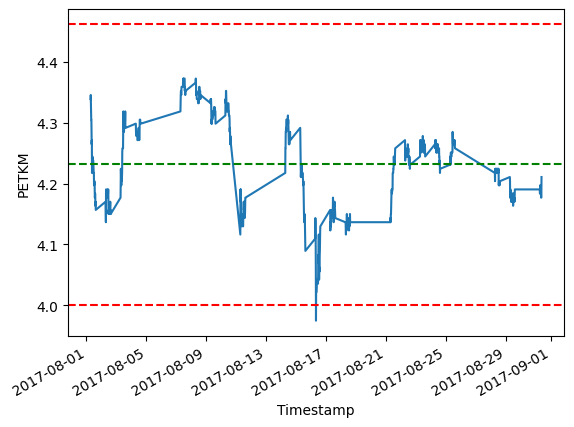
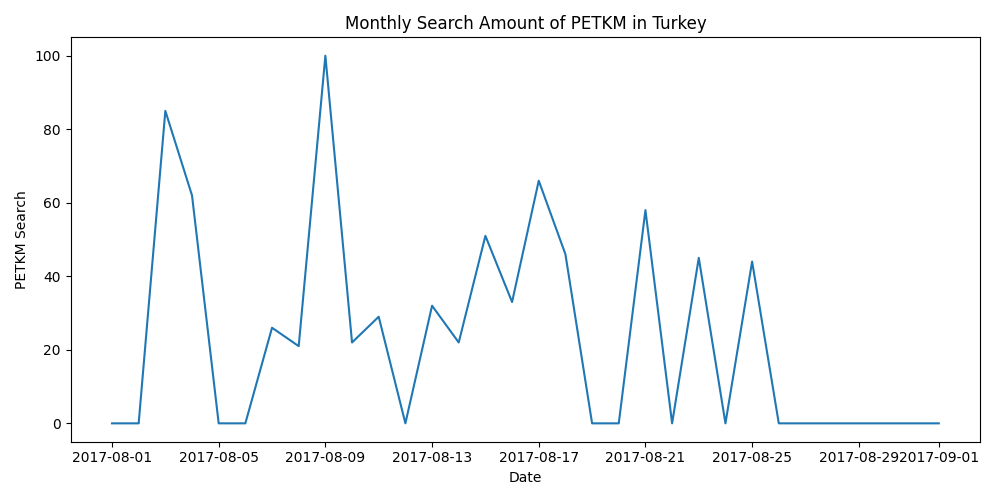

On the same day (16.08.2017) that the share price fell, as seen as an outlier in the first graph, news broke that the Petrol-Is Union demanded the reinstatement of dismissed employees at Petkim. Stating that the attitudes and behavior of some Petkim executives should be reviewed, the union said that it was unlawful to dismiss without just cause. The fact that the company was subjected to such criticism by the union must have lowered its reputation in the eyes of the public, which in turn lowered its share prices.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/petrol-is-sendikasi--petkimde-is-akitleri-fesh-edilenlerin-ise-iadesini-talep-etti/926460/]

On the other hand, it is seen in google trends data that the search for the word PETKM is above normal both when the value of the share increases and when it decreases. This is an expected situation, as both the decline and exit situations related to stocks are closely related to investors.

-----------------------

**10.09.2018**

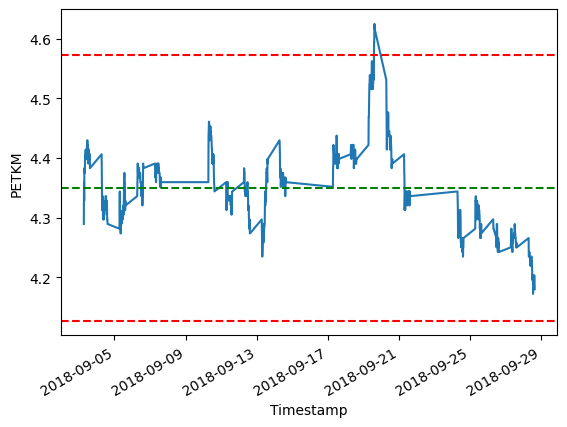

In the statement made on the evening when the share price rose, it was reminded of the previous sales contract between SOCAR and STAR Refinery and it was announced that the necessary tests were started to start the operation of this refinery. As is often the case, new plant purchases and production increases seem to have caused the share price of the relevant company to rise.
[https://tr.investing.com/news/stock-market-news/star-rafinerisinin-devreye-alnmas-icin-testlere-basland-devir-bedelinin-2-taksidi-30-eylule-kadar-odenecekpetkimkap-534504]

-----------------------

**03.06.2019**

![PETKM 2019-6.png](<attachment:PETKM 2019-6.png>)

On the day PETKM's share price fell, SOCAR Turkey's manager announced that the company will also buy oil from Iraq starting next month. Usually this kind of news is news of growth and increase in share value, but perhaps Iraq does not seem to be a reliable investment and may have reduced the reliability and value of the share.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/socar-turkiyegahramanov-gelecek-aydan-itibaren--irak-petrolu-de-almaya-basliyoruz-hurriyet/1347121/]

## EREGL
Erdemir, established in 1960 and privatized in 2006, is Turkey's leading flat steel producer and operates under the OYAK Group. It is a significant entity in the Borsa İstanbul, trading under the ticker "EREGL." The company is integral to the economy of Karadeniz Ereğli, where it is based, and maintains two ports for its operations.

**29.06.2017**

![EREGL 2017-6.png](<attachment:EREGL 2017-6.png>)

In a news article published the day before the outlier seen in the above graph, it was stated that EREGL shares, as well as some other companies, will be offered for sale on the stock exchange after applications to the Central Registry Agency within the framework of the rules set by the Capital Markets Board.
[https://uzmanpara.milliyet.com.tr/kap-haberi/ascel-halks-eregl-ybtas-merkezi-kayit-kurulusu-a-s--borsada-islem-goren-tipe-donusum-duyurusu/892846/]

-----------------------
**03.01.2018**

![EREGL 2018-1.png](<attachment:EREGL 2018-1.png>)

On the second and third of the month, many investment companies published BIST and stock analyzes, and EREGL stock was described as reliable by trusted investment institutions such as Şeker Yatırım. This naturally increased the value of the stock in the eyes of investors and made it popular.
[https://uzmanpara.milliyet.com.tr/kap-haberi/seker-yatirim--erdemir-icin-8-30-tl-hedef-fiyat-ile-tut-tavsiyesini-surdurdu/1009836/]

-----------------------

**03.09.2018**

![EREGL 2018-9.png](<attachment:EREGL 2018-9.png>)

![EREGL GT 18-9.png](<attachment:EREGL GT 18-9.png>)

In the beginning of September 2018, EREGL stocks skyrocketed again, but we could not found any meaningful news that may resulted in those high prices. Google Search trends also didn't give any clue about this for this case.

## FROTO
Ford Otosan is a leading Turkish automotive manufacturer, established in 1959 and a joint venture between Koç Holding and Ford since 1997. It's a major exporter and producer of commercial vehicles and engines in Turkey, with significant contributions to Ford's global operations. As of 2021, it's recognized for producing Turkey's first indigenous transmission and has committed to a significant investment in its production facilities.

**27.09.2017**

![FROTO 2017-9.png](<attachment:FROTO 2017-9.png>)

The news that appeared on a news website in the afternoon of 26.09.2017, one day before the upper outlier, gives an idea about the reason for this outlier. According to the news; Bizim Menkul Değerler, an investment firm, stated that Ford Otosan's export performance was strong, while domestic sales declined. The target price of the company was raised from 35.36 TL to 52.62 TL.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/hisse-degerlendirmesi-bizim-menkul--ford-otosan-hedef-fiyatini-35-36-tlden-52-62-tlye-yukseltti/946498/]

-----------------------

**09.11.2017**

![FROTO 2017-11.png](<attachment:FROTO 2017-11.png>)

According to a news that came out on the same day Outlier was seen; Otokoç Bursa, Turkey's largest automotive retailer, won the "Excellence in Sales Award" for Ford Otosan's sales performance evaluation in the 3rd quarter of 2017. This award seems to have drawn attention to FROTO shares again and increased their share value.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/basin-bulteni-otokoc-bursa--satista-mukemmellik-odulunun-sahibi-oldu/978210/]

-----------------------

**28.03.2018**

![FROTO 2018-3.png](<attachment:FROTO 2018-3.png>)

According to a news report on the day the share price rose; Ford Otomotiv Sanayi A.Ş. (FROTO) decided to distribute cash dividends to its Group A shareholders with a high dividend rate of 193.80%. Similar dividends were envisaged for Group B and C shares. Since high dividend payments are very attractive for investors, it is not surprising that the announcement of this decision has a strong impact on the share price.
[https://uzmanpara.milliyet.com.tr/kap-haberi/froto-ford-otomotiv-sanayi-a-s--kar-payi-dagitim-islemlerine-iliskin-bildirim/1072275/]

-----------------------

![FROTO 2018-6.png](<attachment:FROTO 2018-6.png>)

![FROTO 2018-8.png](<attachment:FROTO 2018-8.png>)

In the last days of June and August 2018, FROTO stock's prices increased again as seen in the above graphs; but we we found no explanatory data about these. But we do see an increasing saerch trend about the stock, while the stock price increases especially at the end of June. This again shows the correlation between the search trends and stock prices.

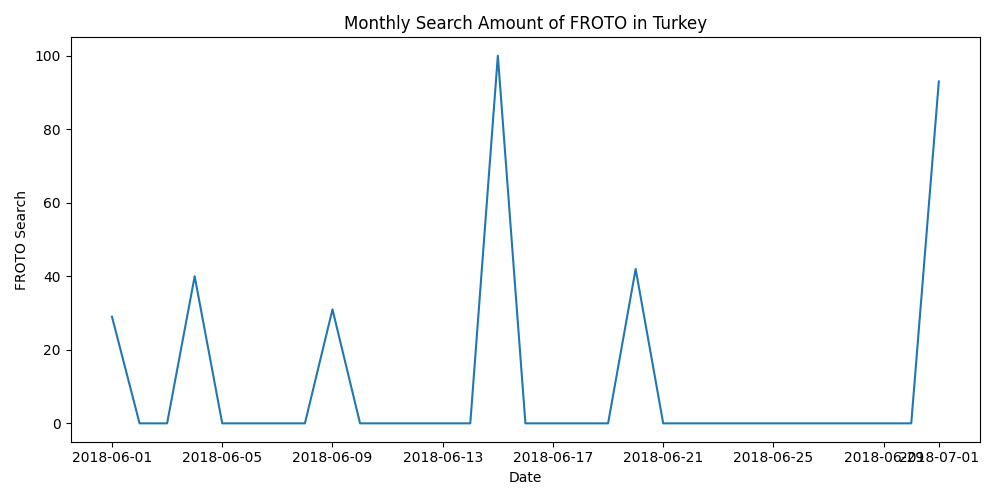 

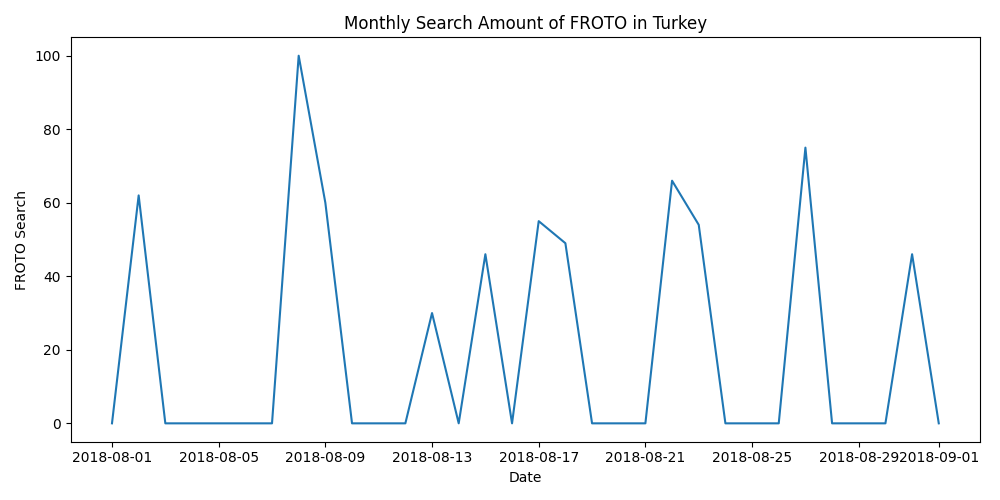

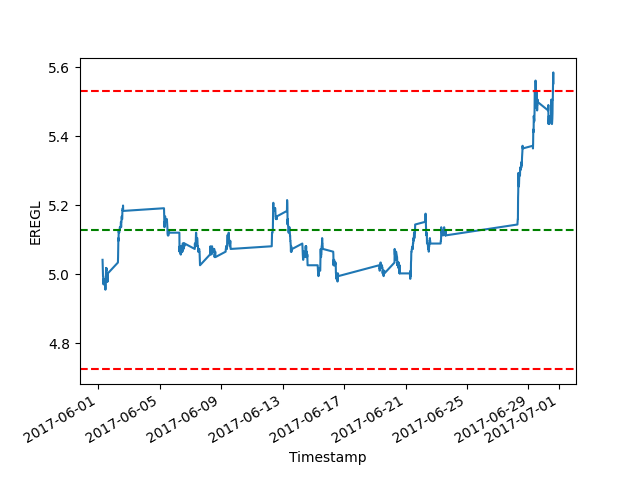
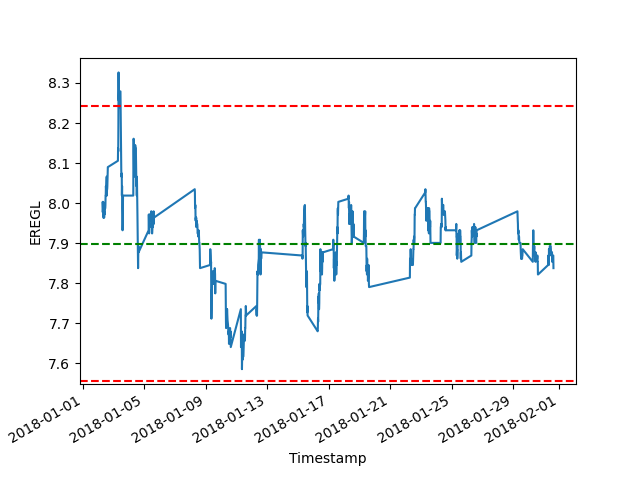
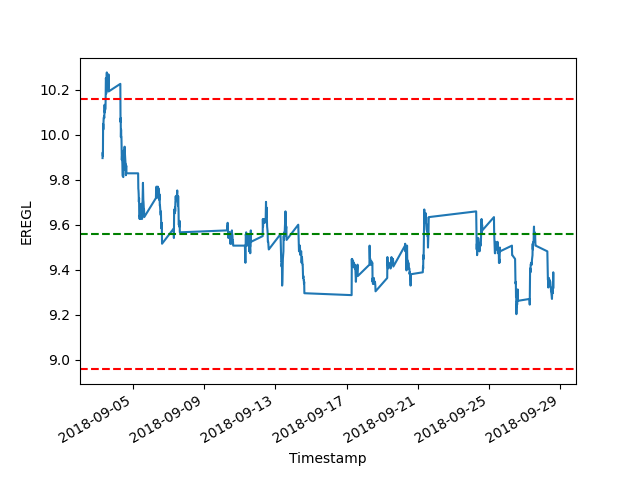
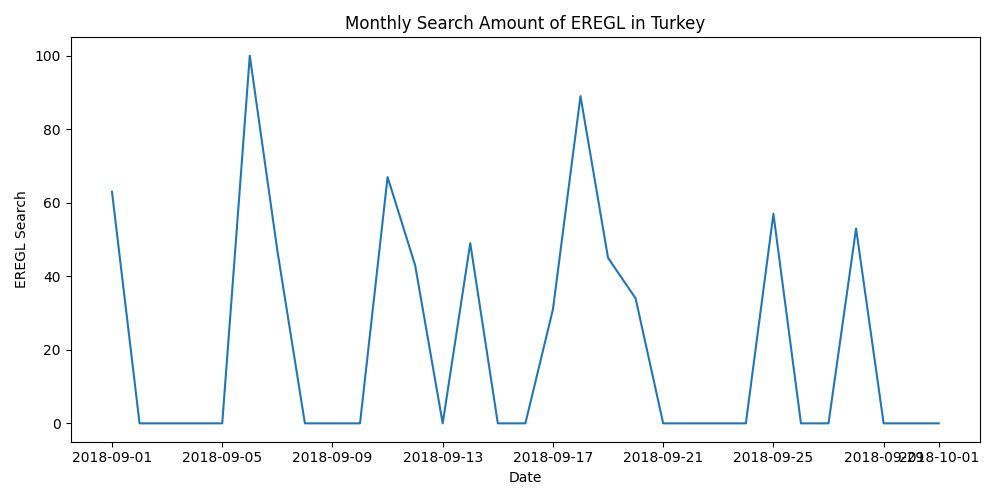
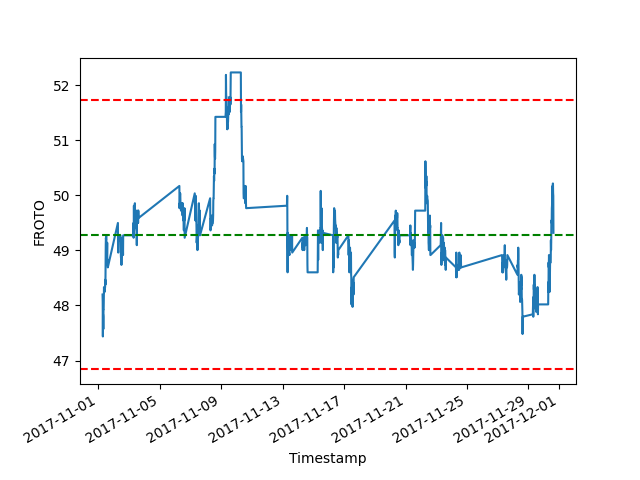
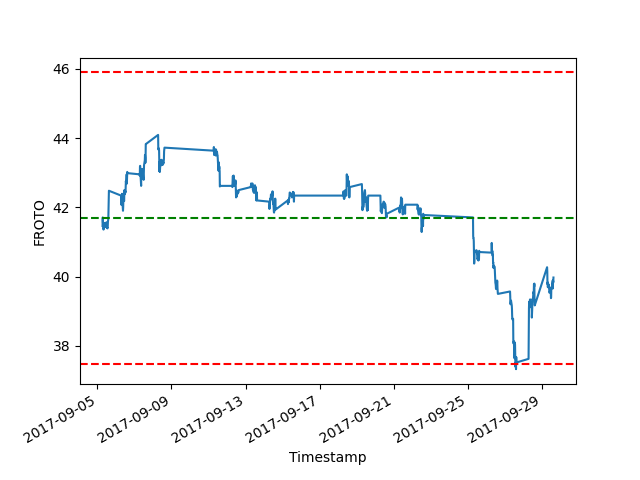
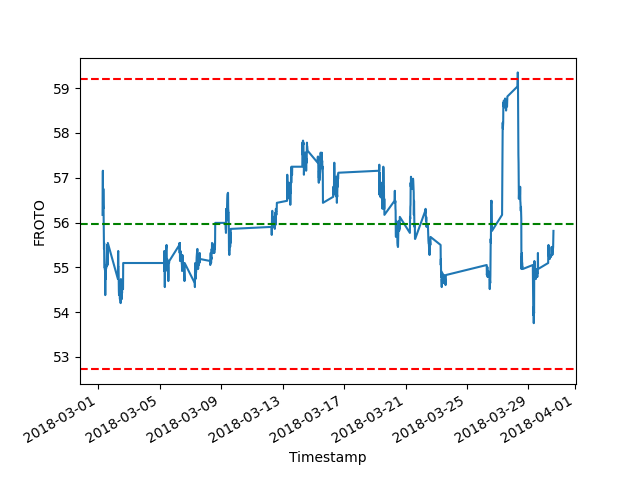
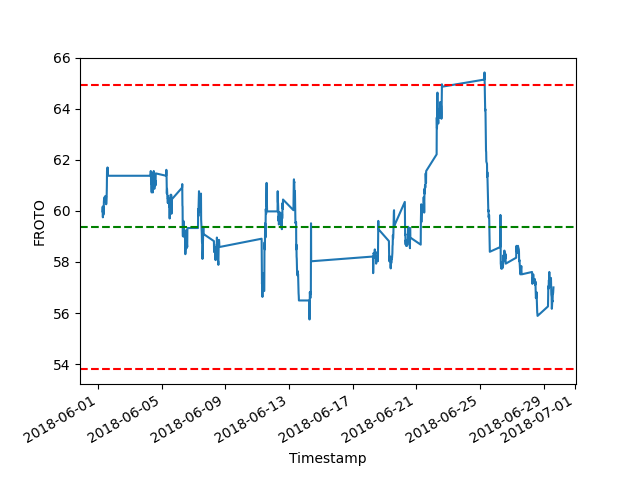
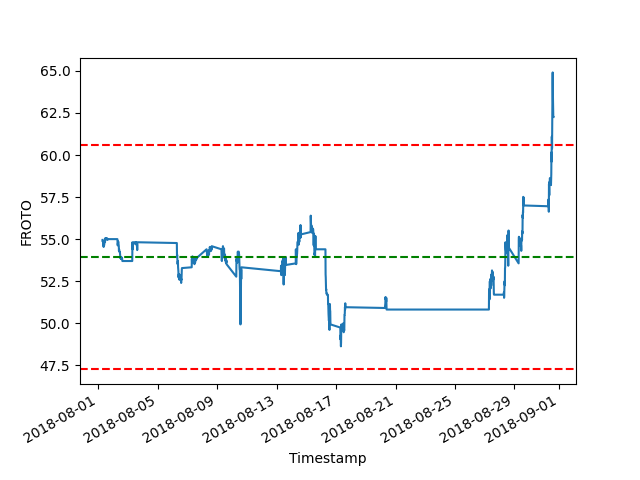
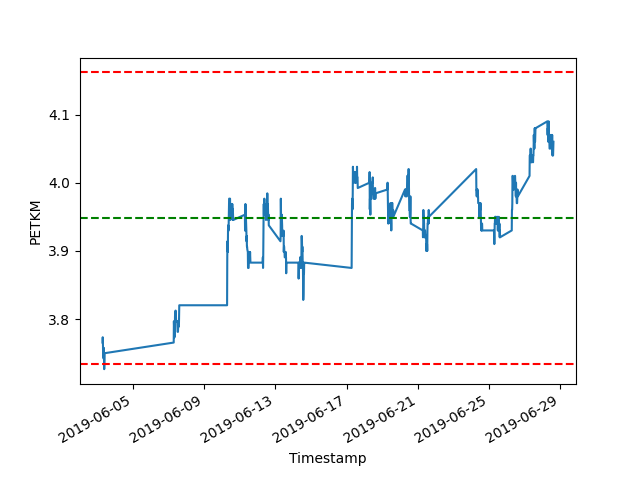